# Term Deposit (FIXED DEPOSIT) Subscription Prediction Project

### Dataset Description

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

Dataset Attributes

Description of all the variables:

Features- 

Variable: Definition

ID: Unique client ID

age: Age of the client

job: Type of job

marital: Marital status of the client

education: Education level

default: Credit in default

housing: Housing loan

loan: Personal loan

contact: Type of communication

month: Contact month

day_of_week: Day of week of contact

duration: Contact duration

campaign: number of contacts performed during this campaign to the client

pdays: number of days that passed by after the client was last contacted

previous: number of contacts performed before this campaign

poutcome: outcome of the previous marketing campaign


Target-

Subscribed: has the client subscribed a term deposit? (YES/NO)

Predict- Client subscribed a term deposit? Yes/No


### Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Support Vector Classifier
from sklearn.svm import SVC

# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

# Saving and loading models
import joblib

### Elaboratory Data Analysis

In [2]:
# Load data from CSV into DataFrame

# Training data
df_train = pd.read_csv('Term_Deposit_Train.csv')

# Testing data
df_test = pd.read_csv('Term_Deposit_Test.csv')

In [3]:
# Display first 5 rows of the dataframe
df_train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [4]:
# Display first 5 rows of the dataframe
df_test.head()

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

In [5]:
# Display last 5 rows of the dataframe
df_train.tail()

ID  age         job   marital  education default  balance housing  \
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes

In [6]:
# Display last 5 rows of the dataframe
df_test.tail()

ID  age          job  marital  education default  balance housing  \
13559  23465   39   management  married   tertiary      no       45      no   
13560  11743   54  blue-collar  married    primary      no     2281     yes   
13561  28292   35      retired  married    primary      no      285     yes   
13562  45163   29       admin.   single  secondary      no      464      no   
13563  34839   29       admin.  married  secondary      no        2     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  
13559   no  cellular   28   aug       148         4     -1         0  unknown  
13560   no   unknown   20   jun       158         1     -1         0  unknown  
13561   no  cellular   29   jan       136         1     -1         0  unknown  
13562   no  cellular    9   nov       208         2     91         3  success  
13563   no  cellular    6   may       339         1    362         1  failure

In [7]:
# Display shape of the dataframe
df_train.shape

(31647, 18)

In [8]:
# Display shape of the dataframe
df_test.shape

(13564, 17)

In [9]:
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [10]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [11]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [13]:
df_train.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [14]:
df_test.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [17]:
df_train.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

In [18]:
df_test.describe()

ID           age       balance           day      duration  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean   22704.057726     40.887128   1358.496535     15.738646    258.278679   
std    12994.043329     10.604108   3082.940623      8.288174    258.488648   
min        1.000000     18.000000  -3313.000000      1.000000      0.000000   
25%    11546.000000     33.000000     71.000000      8.000000    102.000000   
50%    22782.000000     39.000000    445.000000     16.000000    180.000000   
75%    33974.250000     48.000000   1413.250000     21.000000    319.000000   
max    45206.000000     95.000000  98417.000000     31.000000   3253.000000   

           campaign         pdays      previous  
count  13564.000000  13564.000000  13564.000000  
mean       2.759510     41.648555      0.594441  
std        3.060928    101.985178      1.998193  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       58.000000    850.000000     55.000000

### Data Visualization

In [19]:
sns.set(style = 'whitegrid')

#### Univariate Analysis

#### Count Plot

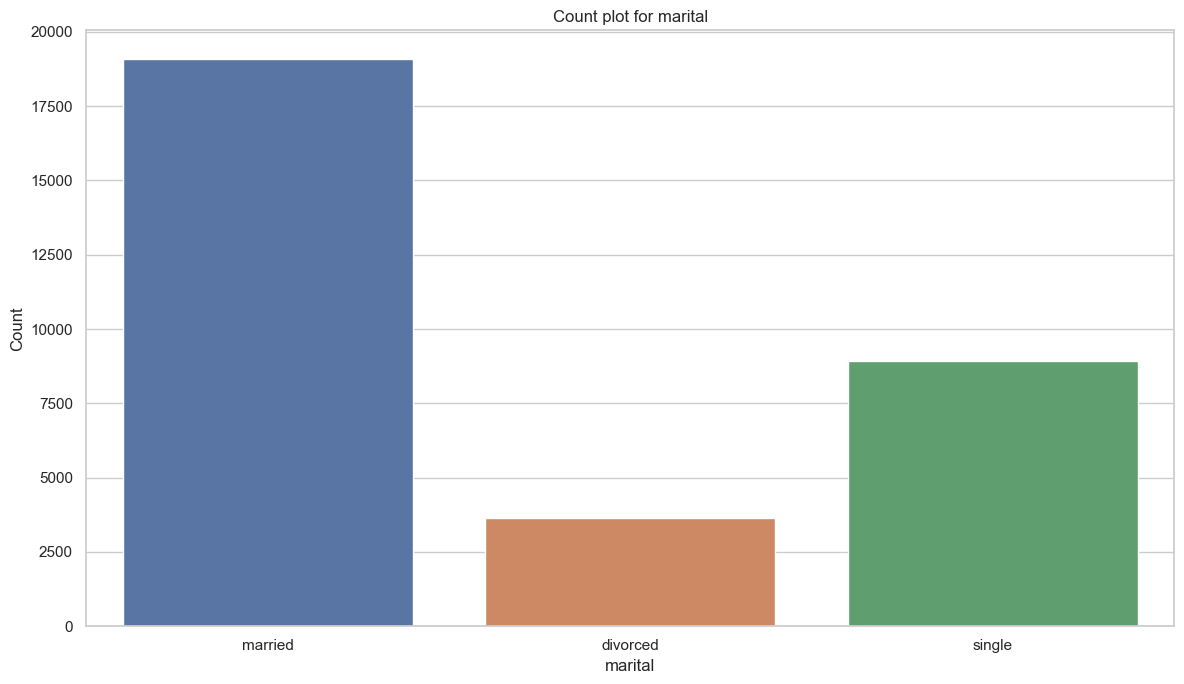

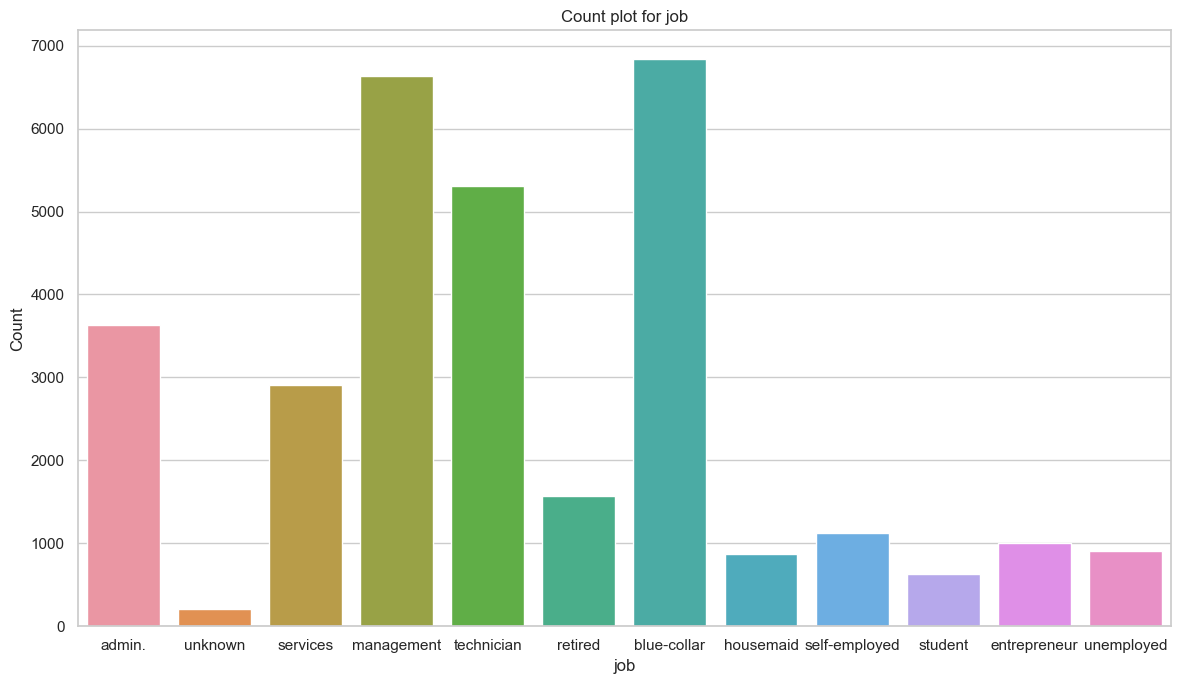

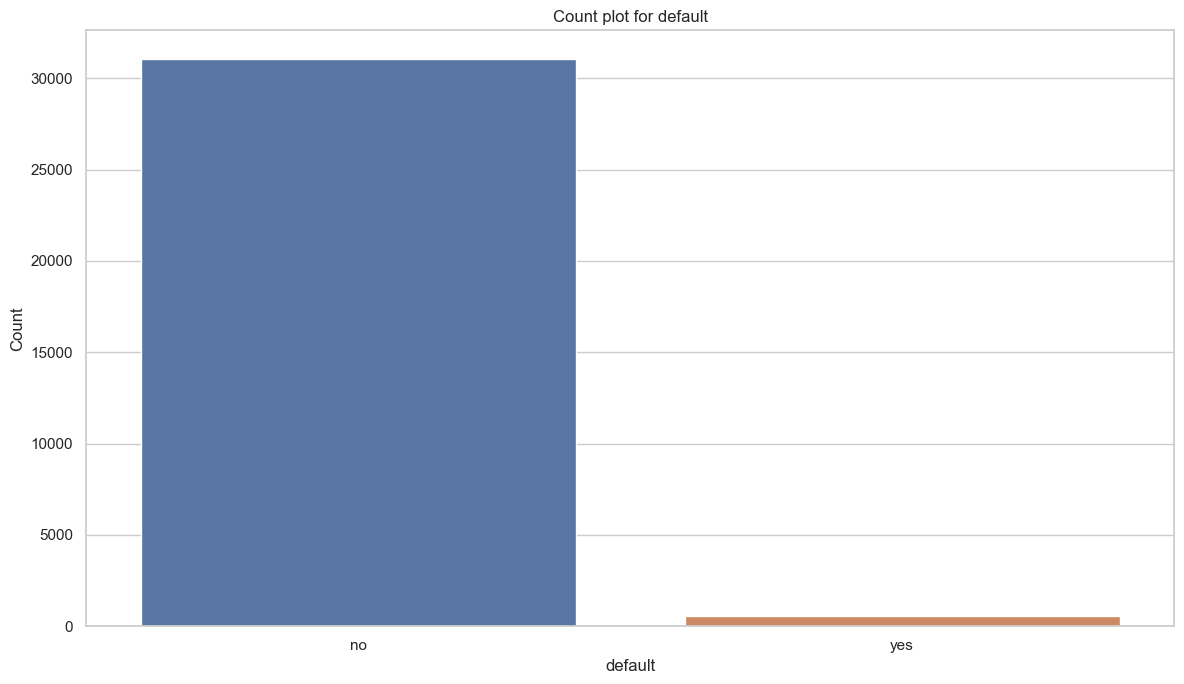

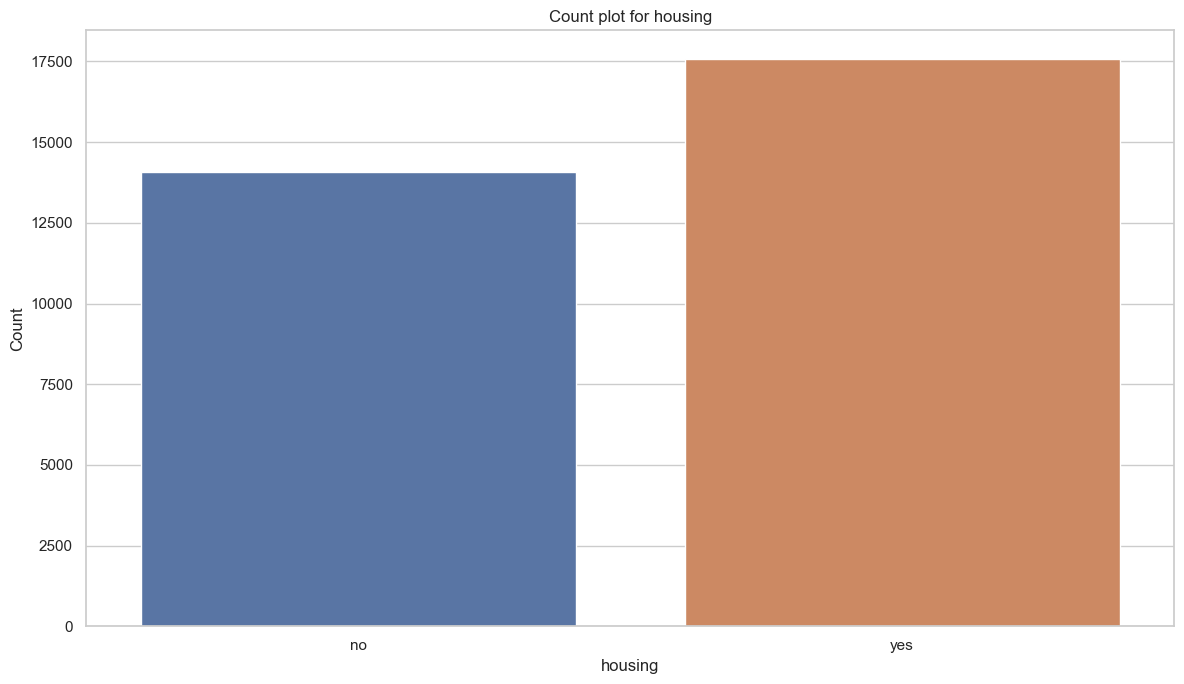

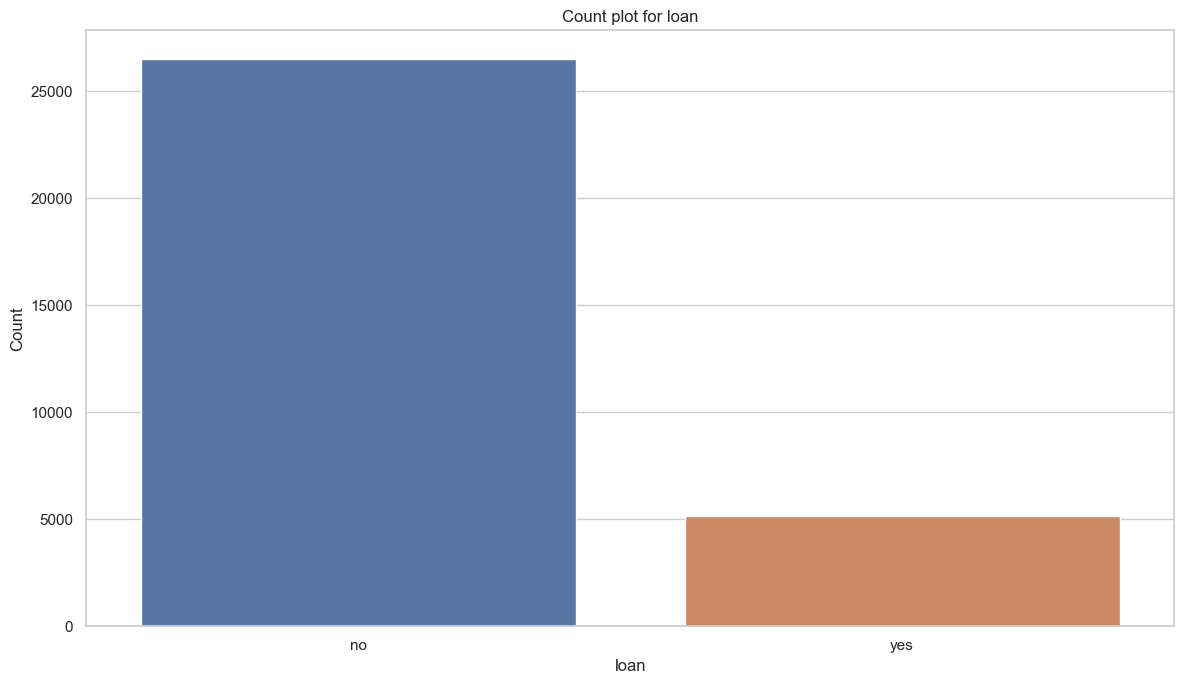

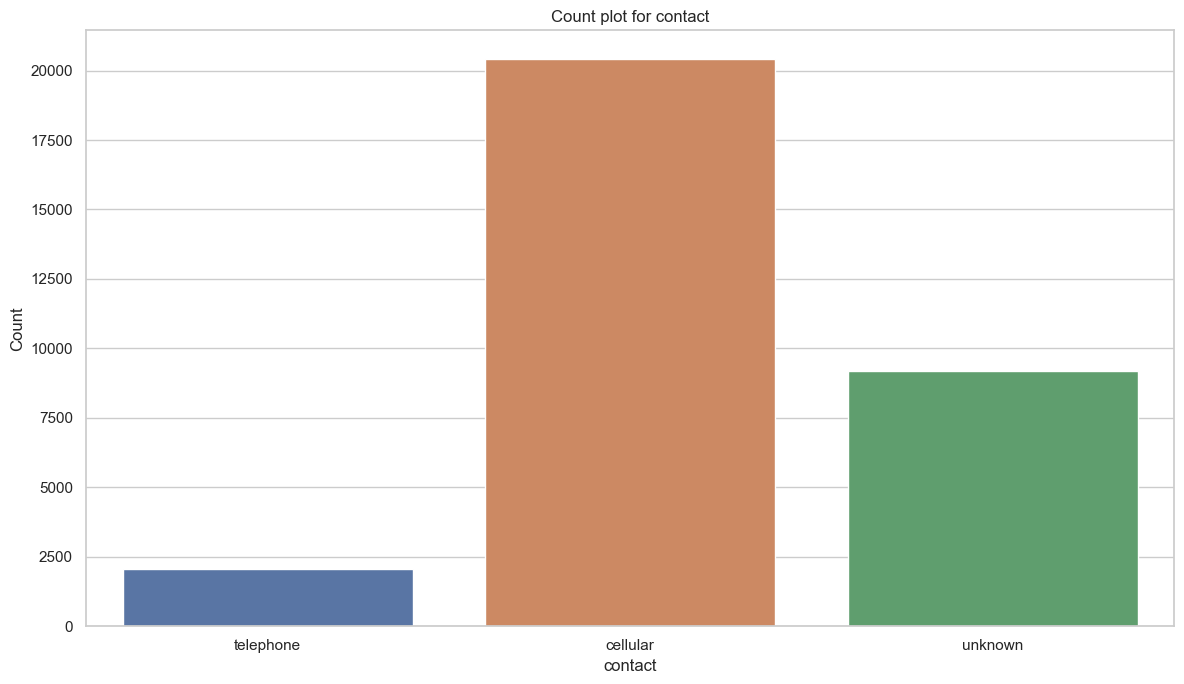

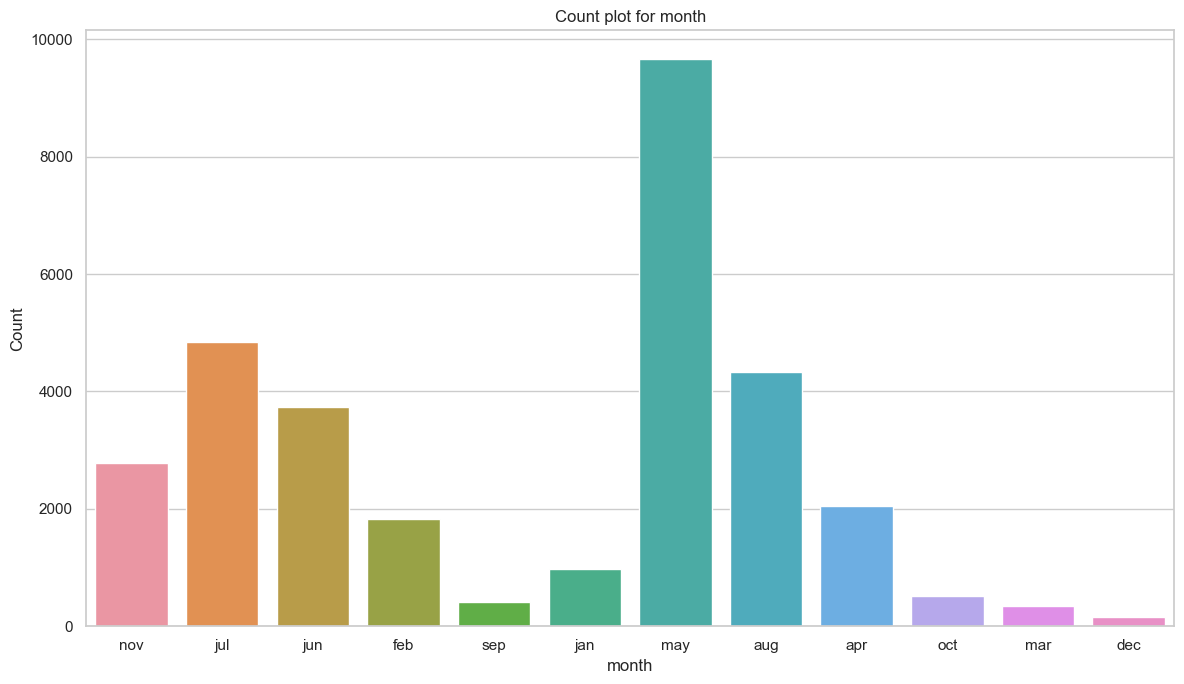

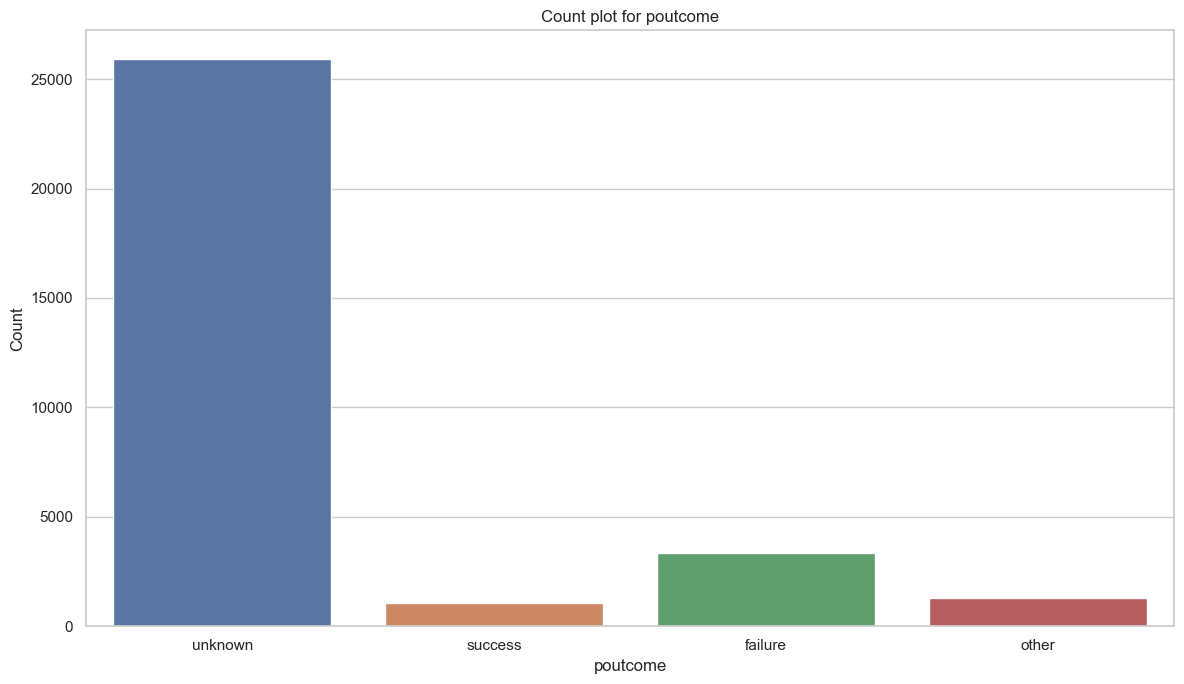

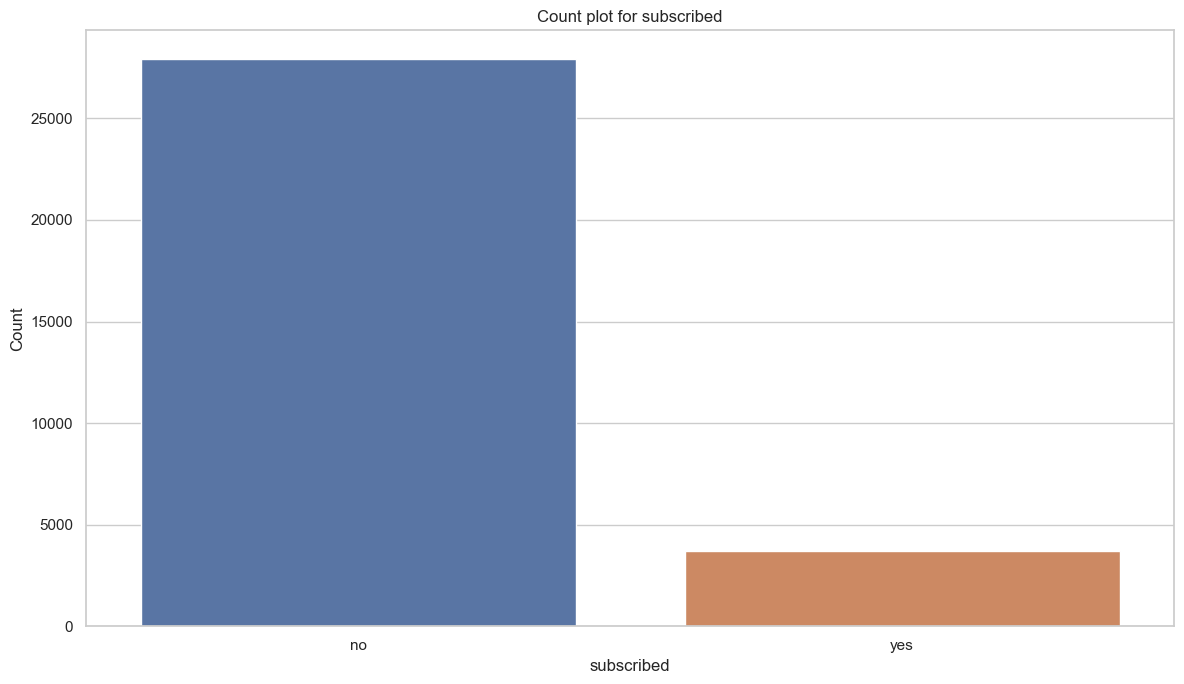

In [20]:
# Univariate analysis using countplot
columns = ['marital','job', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (12, 7))  
    sns.countplot(x = columns[i], data = df_train, ax = axes)
    plt.title(f"Count plot for {columns[i]}")
    plt.xlabel(columns[i])
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

#### Pie Chart 

#### Histogram

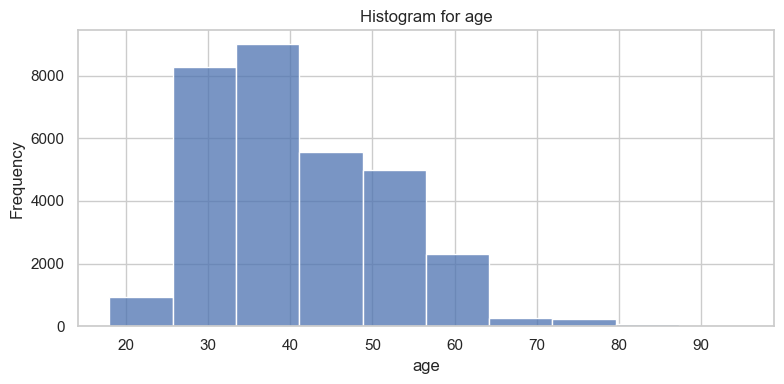

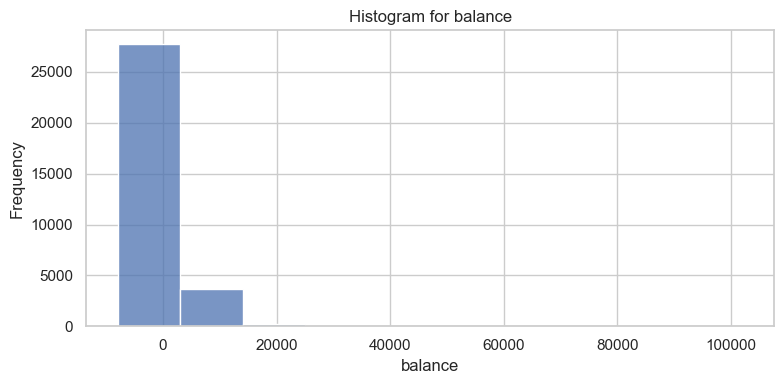

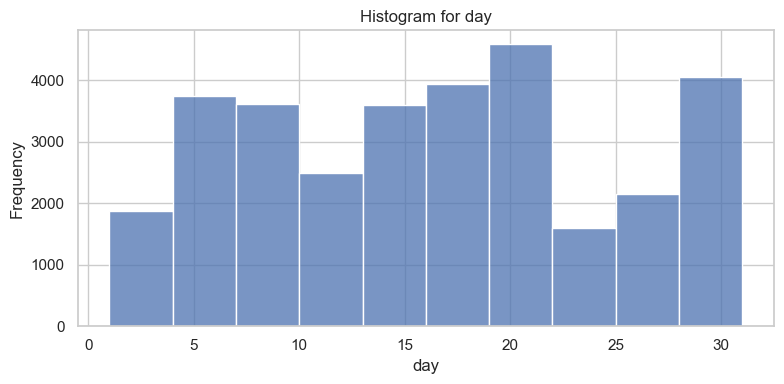

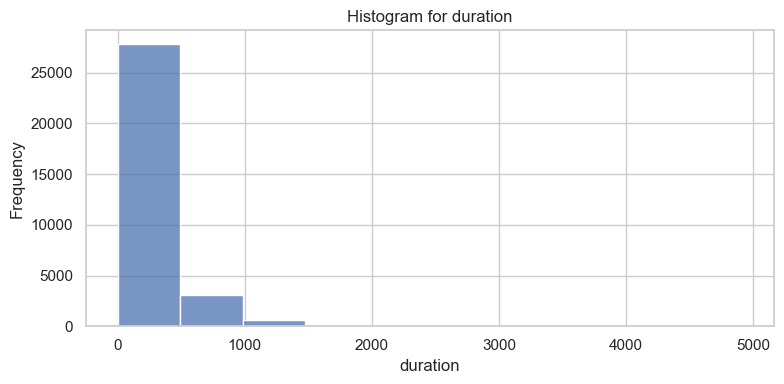

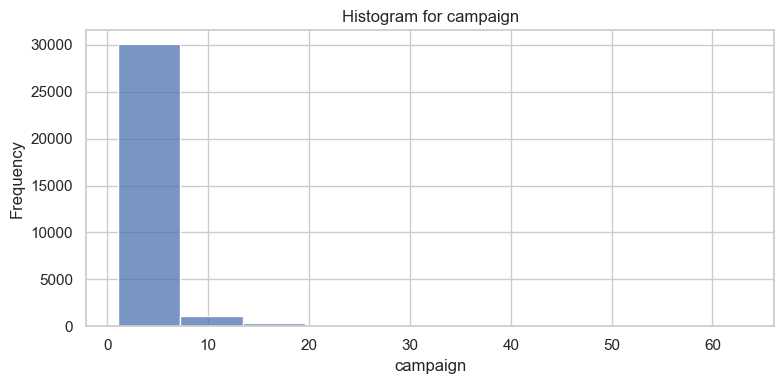

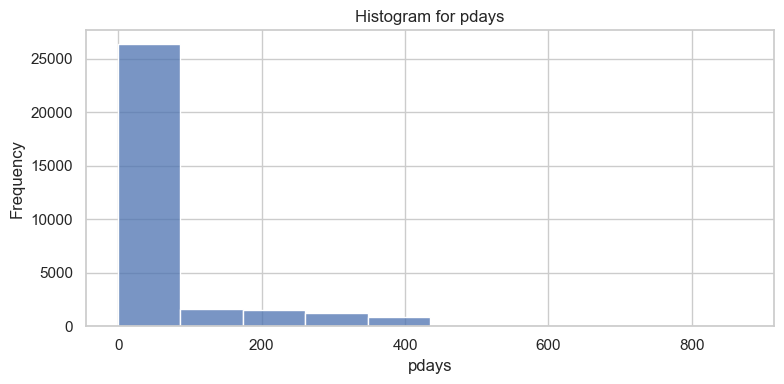

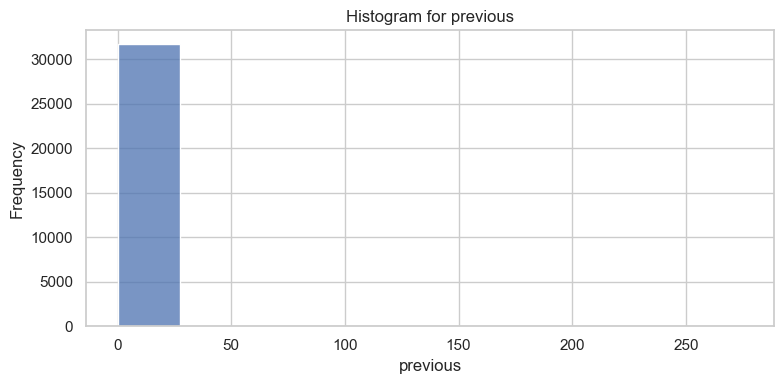

In [21]:
# Univariate analysis using histogram
columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize=(8, 4))  
    sns.histplot(df_train[columns[i]], bins=10, ax = axes)
    plt.title(f"Histogram for {columns[i]}")
    plt.xlabel(columns[i])
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()  

#### Bivariate Analysis

#### Scatter Plot

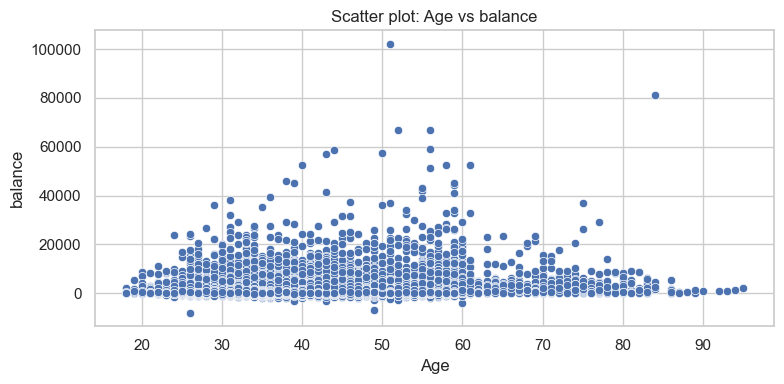

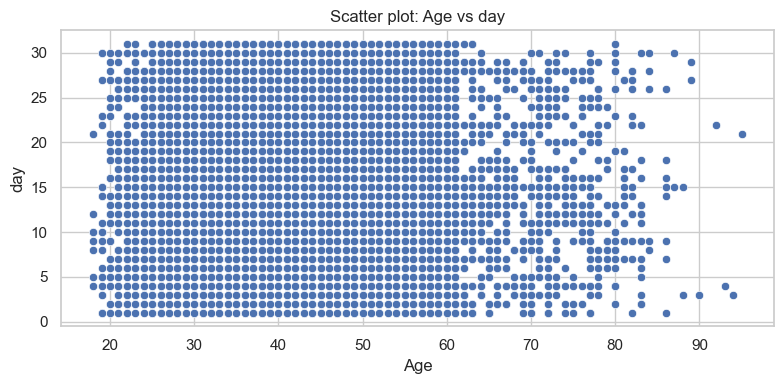

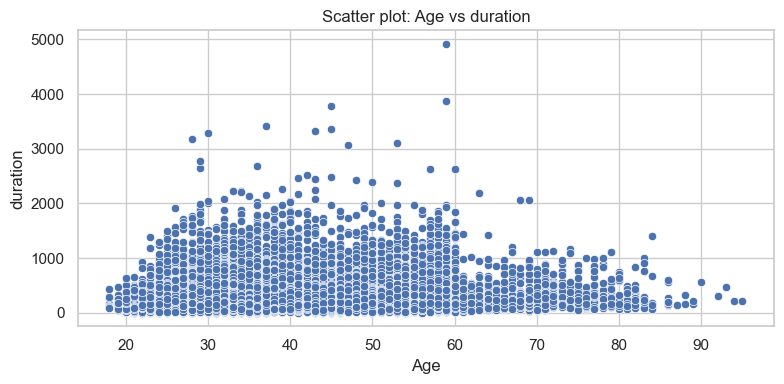

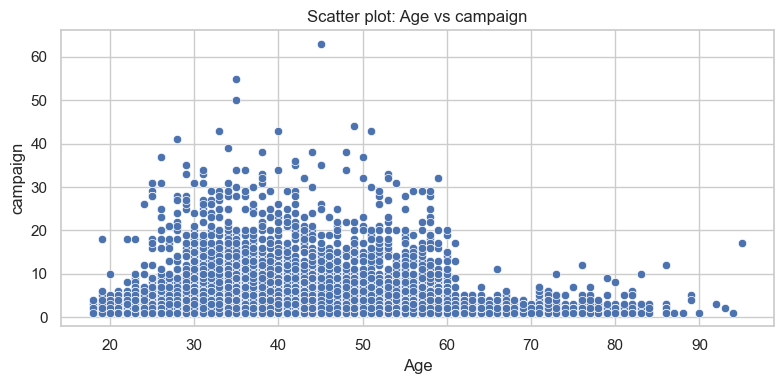

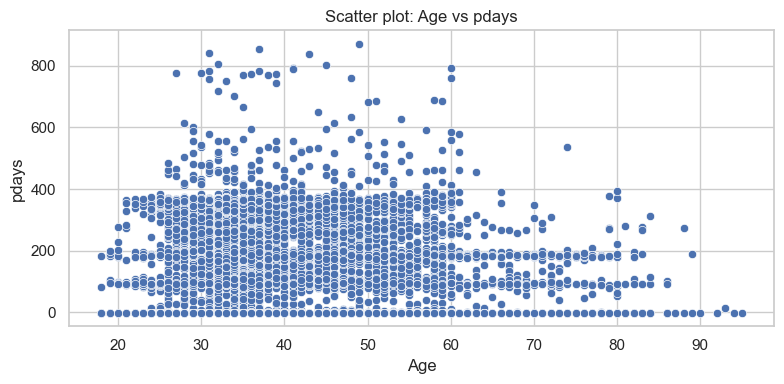

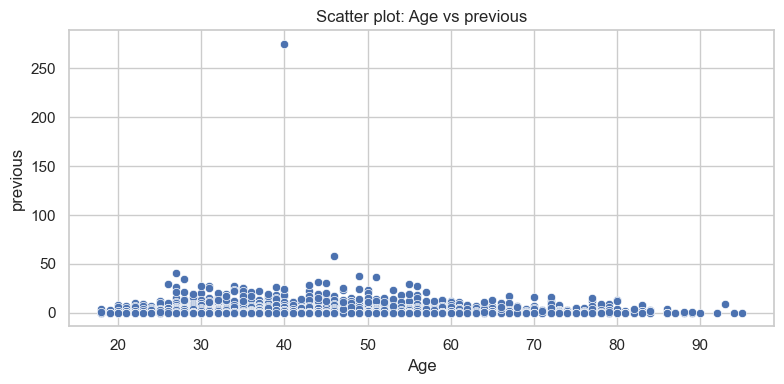

In [22]:
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.scatterplot(data = df_train, x = 'age', y = columns[i], ax = axes)
    plt.title(f"Scatter plot: Age vs {columns[i]}")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.tight_layout()
    plt.show()  

#### Line Plot

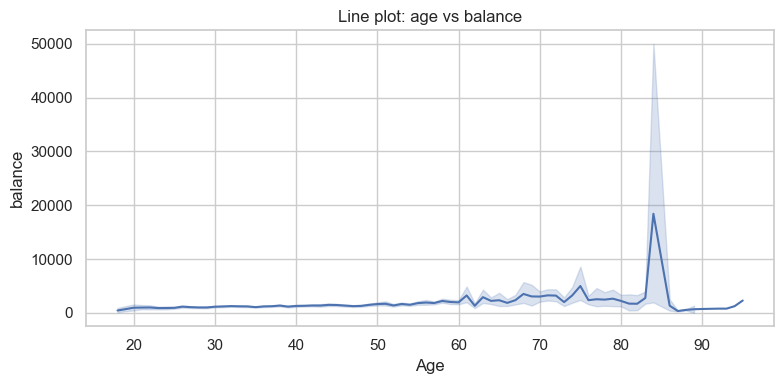

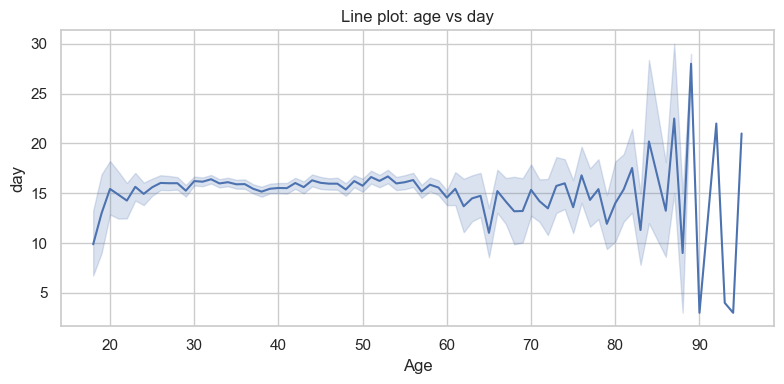

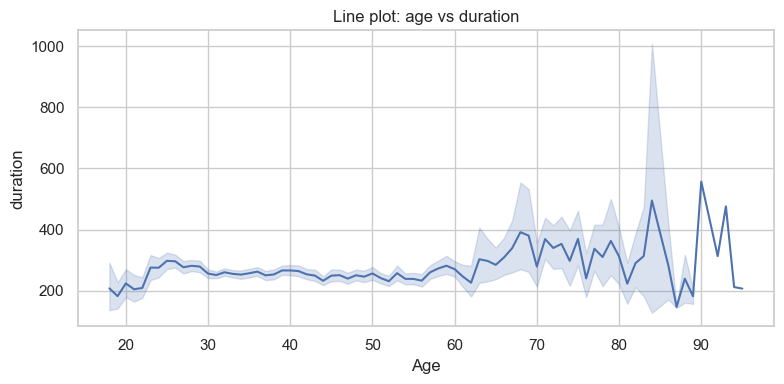

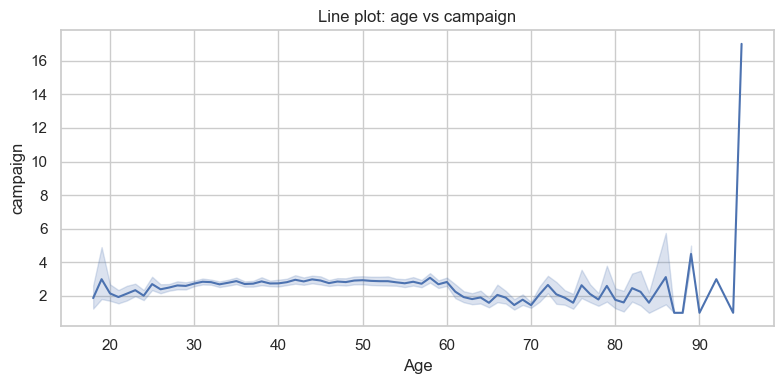

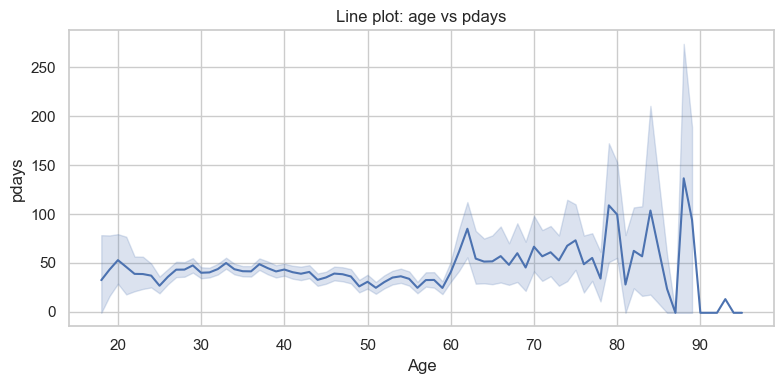

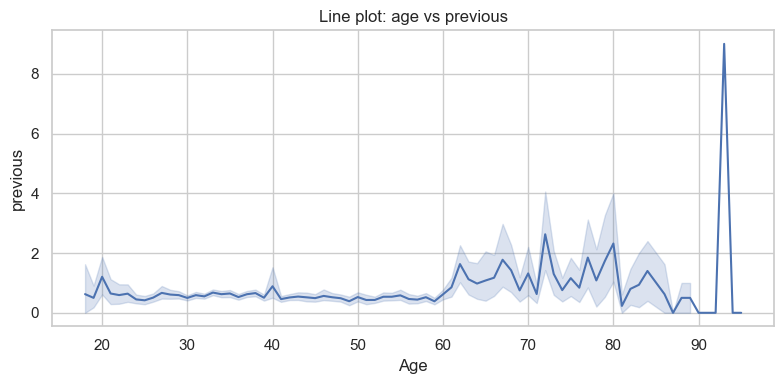

In [23]:
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.lineplot(data = df_train, x = 'age', y = columns[i], ax = axes)
    plt.title(f"Line plot: age vs {columns[i]}")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.tight_layout()
    plt.show()  

#### Multivariate analysis

#### Scatter plot

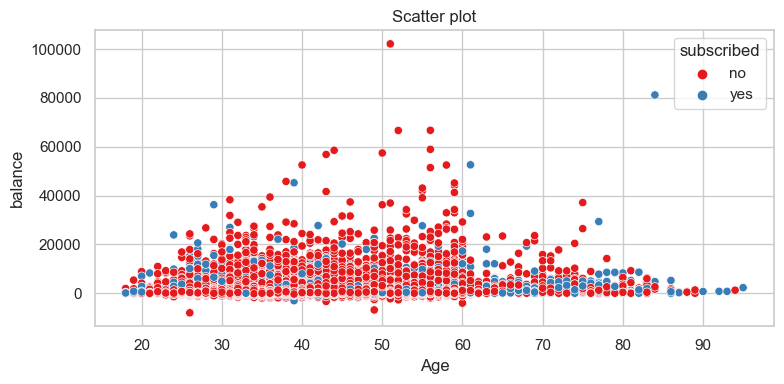

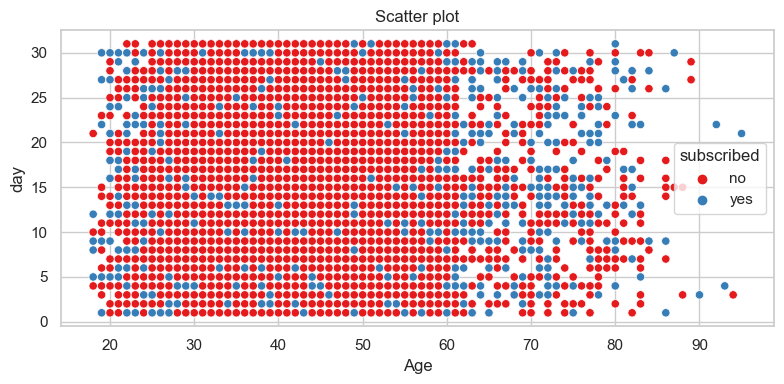

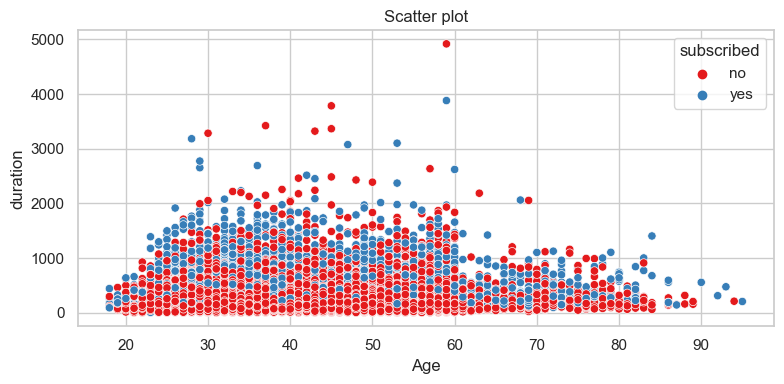

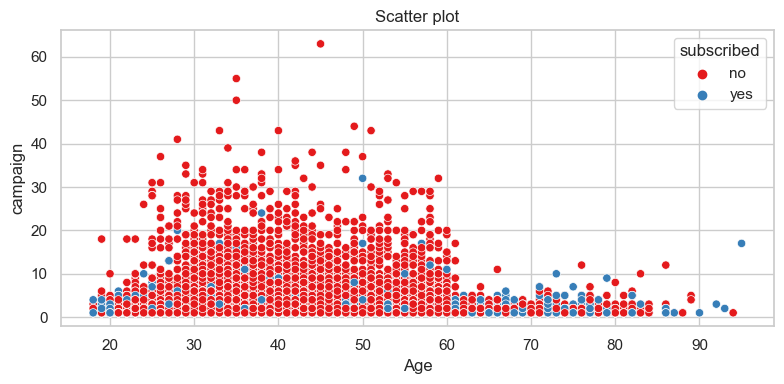

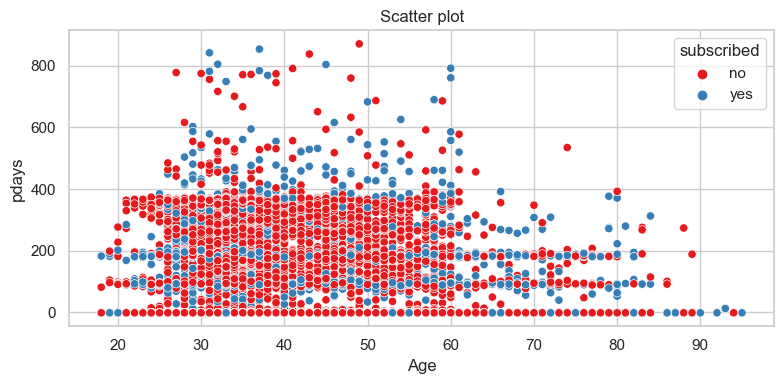

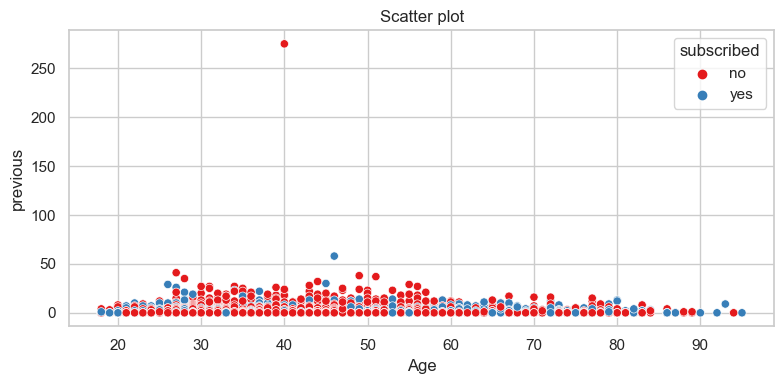

In [24]:
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.scatterplot(data = df_train, x = 'age', y = columns[i], hue = 'subscribed', palette = 'Set1', ax = axes)
    plt.title(f"Scatter plot")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.legend(title = 'subscribed')
    plt.tight_layout()
    plt.show()  

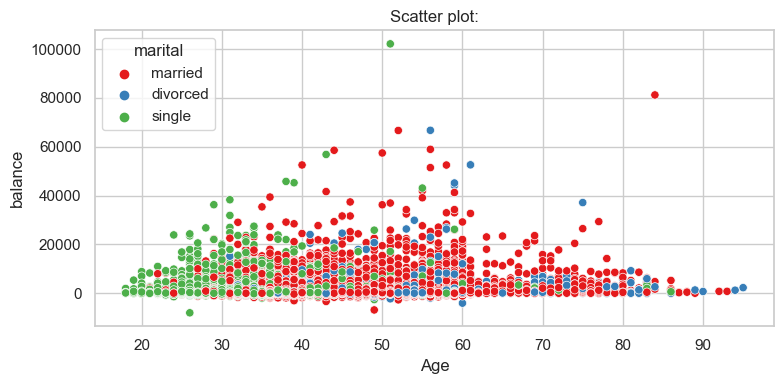

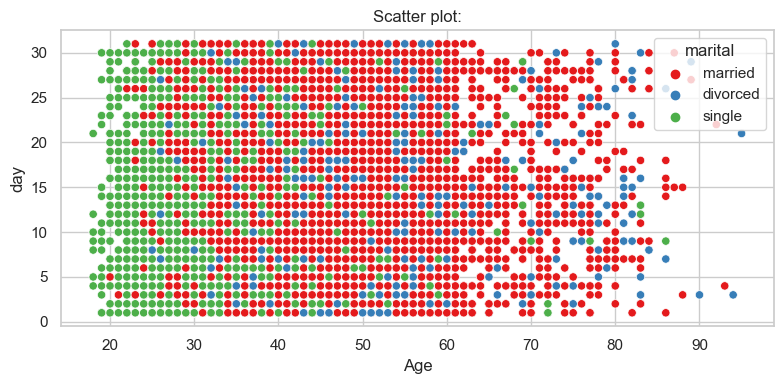

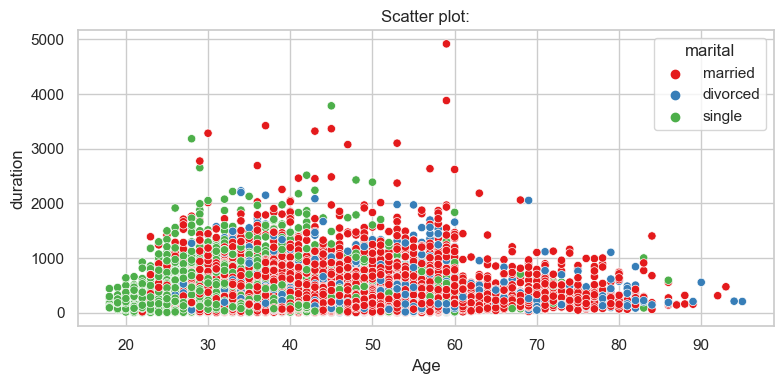

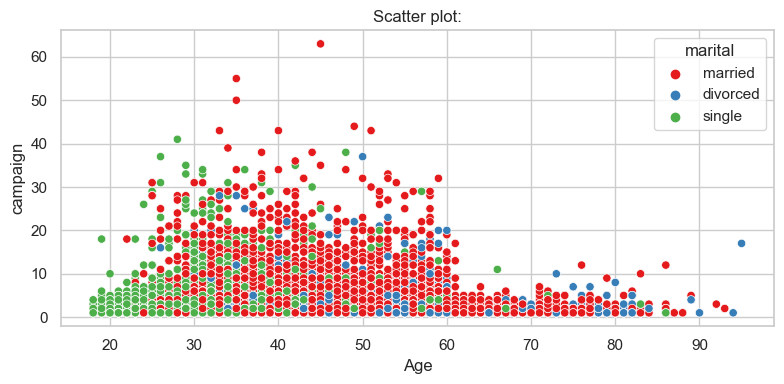

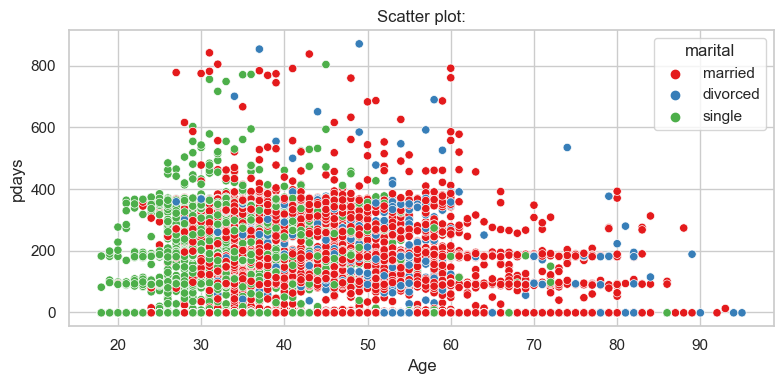

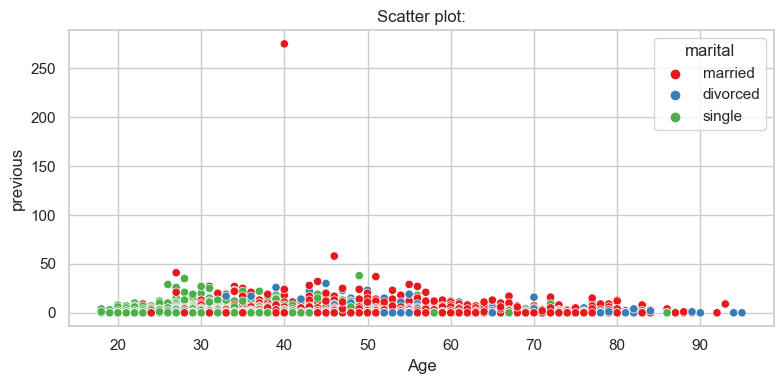

In [25]:
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.scatterplot(data = df_train, x = 'age', y = columns[i], hue = 'marital', palette = 'Set1', ax = axes)
    plt.title(f"Scatter plot:")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.legend(title = 'marital')
    plt.tight_layout()
    plt.show()  

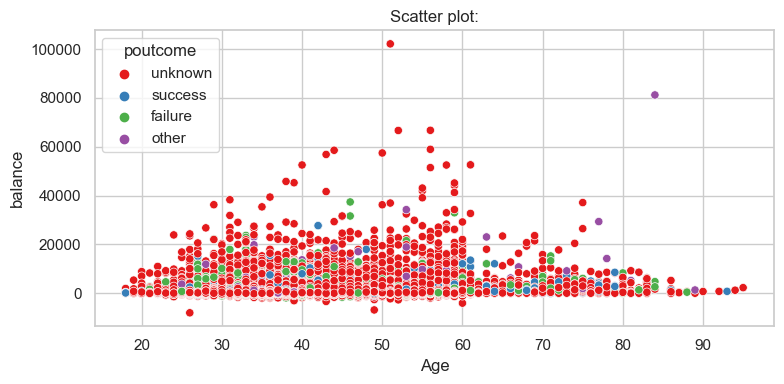

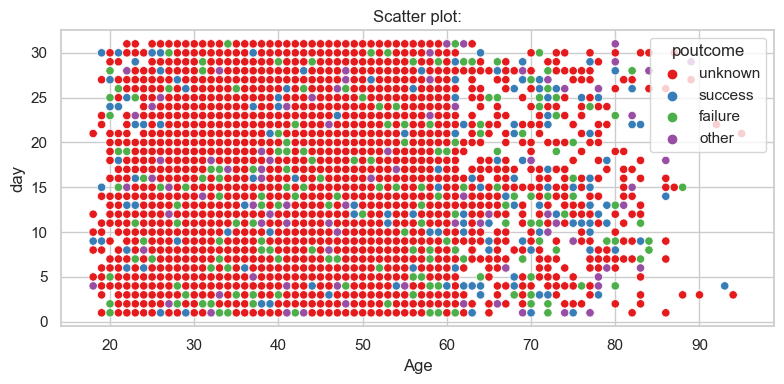

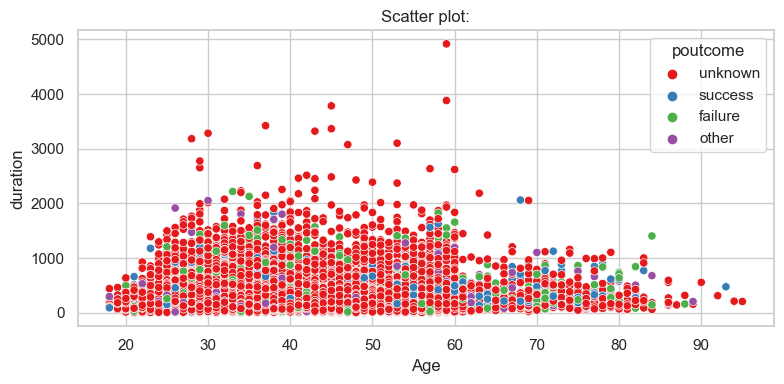

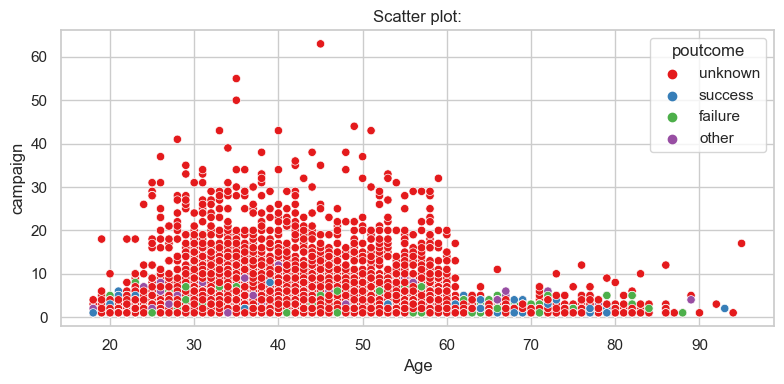

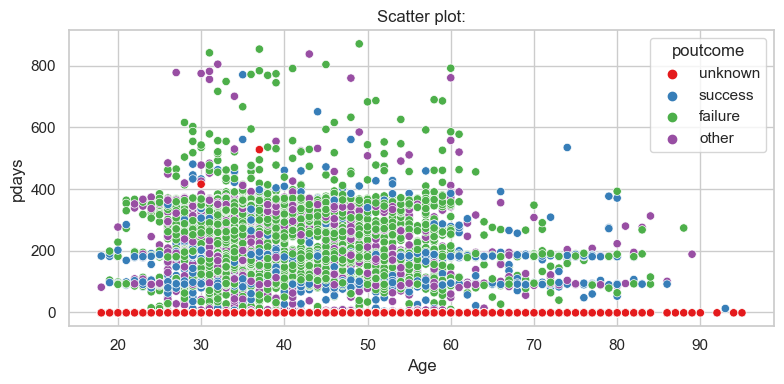

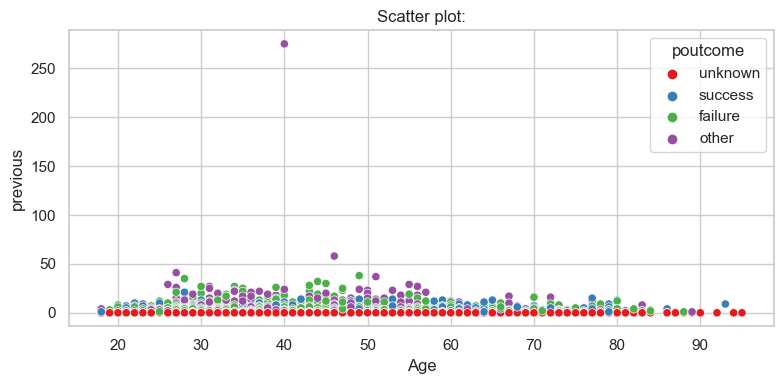

In [26]:
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.scatterplot(data = df_train, x = 'age', y = columns[i], hue = 'poutcome', palette = 'Set1', ax = axes)
    plt.title(f"Scatter plot:")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.legend(title = 'poutcome')
    plt.tight_layout()
    plt.show()  

In [27]:
df_train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [28]:
# Dropping columns containing unique values
df_train.drop('ID', axis = 1, inplace = True)

In [29]:
# Converting categorical columns into numerical columns
encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
for i in range(len(categorical_columns)):
    df_train[categorical_columns[i]] = encoder.fit_transform(df_train[categorical_columns[i]])
df_train.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   56    0        1          3        0     1933        0     0        1   
1   31   11        1          1        0        3        0     0        0   
2   27    7        1          1        0      891        1     0        0   
3   57    4        0          2        0     3287        0     0        0   
4   31    9        1          1        0      119        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0   19      9        44         2     -1         0         3           0  
1   20      5        91         2     -1         0         3           0  
2   18      5       240         1     -1         0         3           0  
3   22      6       867         1     84         3         2           1  
4    4      3       380         1     -1         0         3           0

In [30]:
# Dropping columns containing unique values
df_test.drop('ID', axis = 1, inplace = True)

In [31]:
# Converting categorical columns into numerical columns
encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for i in range(len(categorical_columns)):
    df_test[categorical_columns[i]] = encoder.fit_transform(df_test[categorical_columns[i]])
df_test.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   32    7        1          1        0      118        1     0        0   
1   78    5        0          0        0     2787        0     0        1   
2   31    6        2          2        0      144        1     0        2   
3   57    7        2          0        0     3777        1     0        1   
4   45    1        0          1        0     -705        0     1        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0   15      8        20         6     -1         0         3  
1    1      5       372         1     -1         0         3  
2   16      8       676         1     -1         0         3  
3   13      8        65         2     -1         0         3  
4    3      5       111         1     -1         0         3

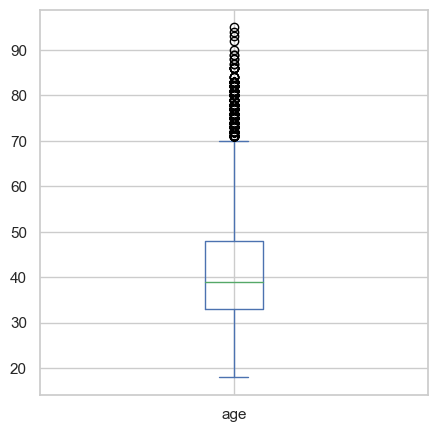

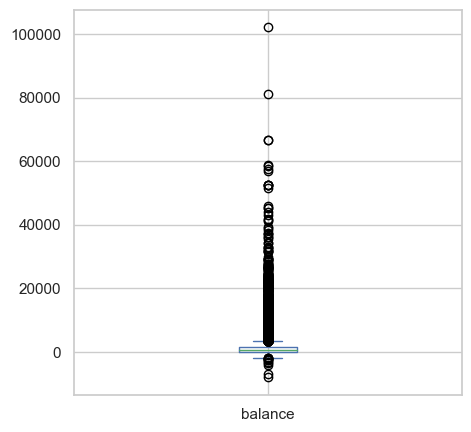

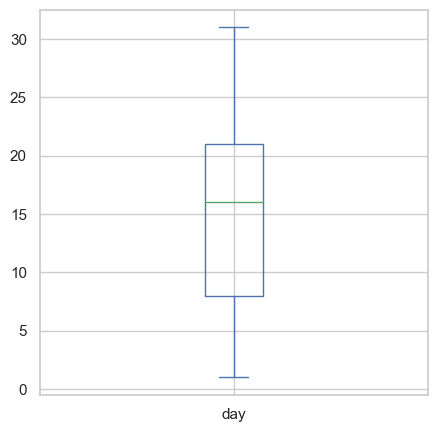

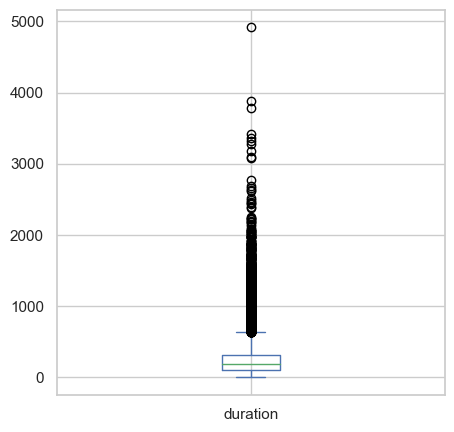

In [32]:
# Cheking for the outliers

numerical_columns = ['age', 'balance', 'day', 'duration']

# Using boxplot
for i in range(len(numerical_columns)):
    df_train[numerical_columns[i]].plot(kind = 'box', figsize = (5, 5))
    plt.show()

Outliers are present

In [33]:
# Using Z-Score
z_score = abs(zscore(df_train[numerical_columns]))
z_score

age   balance       day  duration
0      1.415793  0.187933  0.379579  0.832754
1      0.937156  0.449397  0.499526  0.649957
2      1.313627  0.156159  0.259631  0.070449
3      1.509911  0.635055  0.739422  2.368149
4      0.937156  0.411091  1.419637  0.474054
...         ...       ...       ...       ...
31642  1.125392  0.450388  0.460055  0.552724
31643  1.133439  0.324903  1.299690  0.699635
31644  0.843038  0.347358  1.059794  0.859979
31645  1.509911  0.376088  0.100212  0.918319
31646  1.321675  0.383022  0.580003  6.669728

[31647 rows x 4 columns]

In [34]:
# Removing Outliers
z = 3
df_train1 = df_train[(z_score < z).all(axis = 1)]
df_train1.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   56    0        1          3        0     1933        0     0        1   
1   31   11        1          1        0        3        0     0        0   
2   27    7        1          1        0      891        1     0        0   
3   57    4        0          2        0     3287        0     0        0   
4   31    9        1          1        0      119        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0   19      9        44         2     -1         0         3           0  
1   20      5        91         2     -1         0         3           0  
2   18      5       240         1     -1         0         3           0  
3   22      6       867         1     84         3         2           1  
4    4      3       380         1     -1         0         3           0

In [35]:
df_train1.shape

(30206, 17)

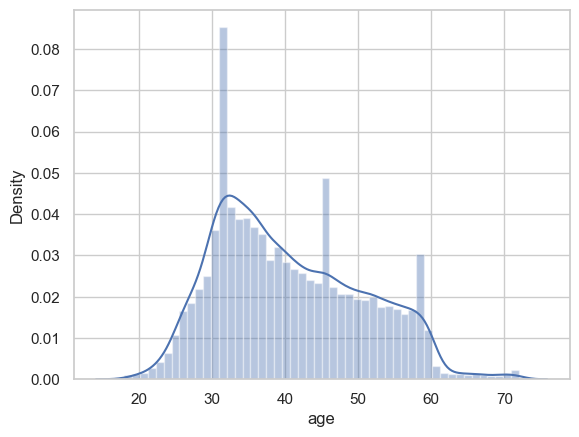

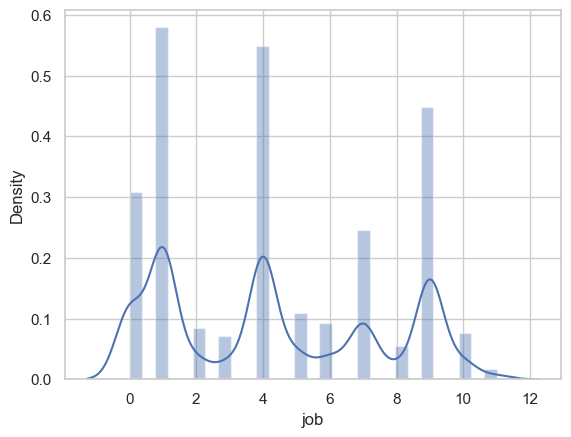

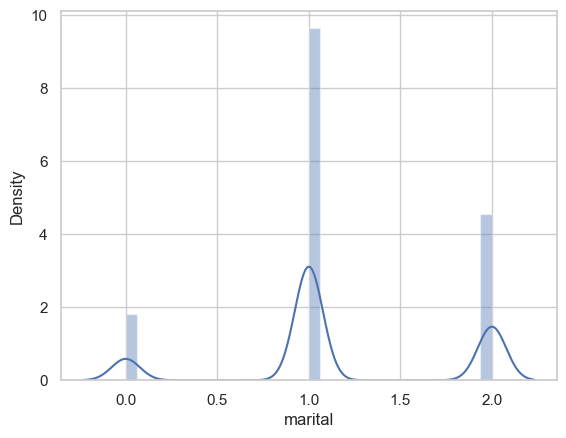

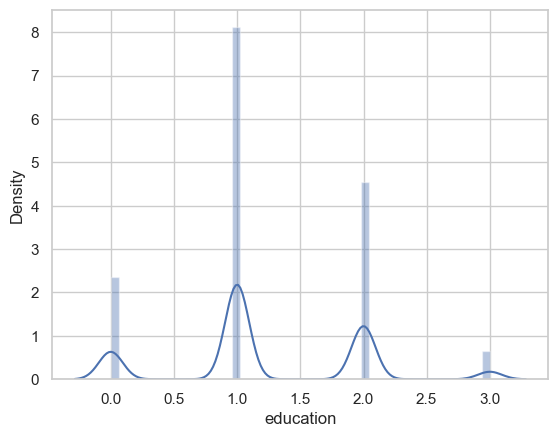

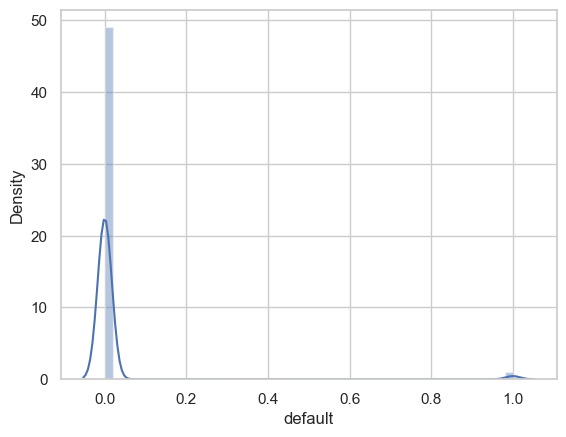

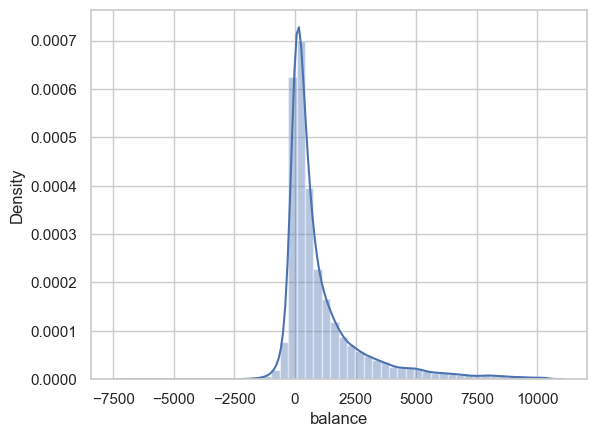

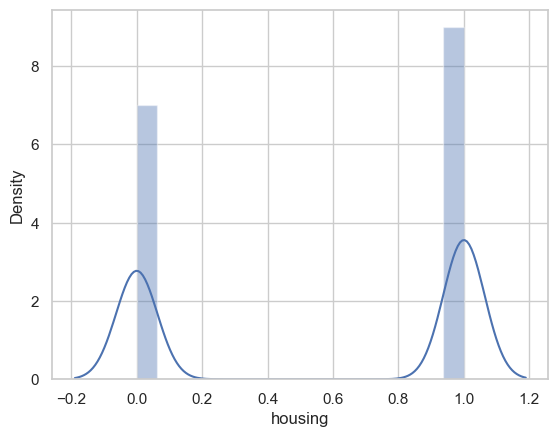

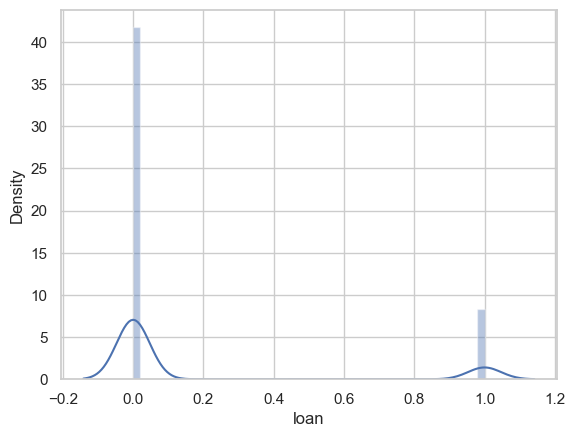

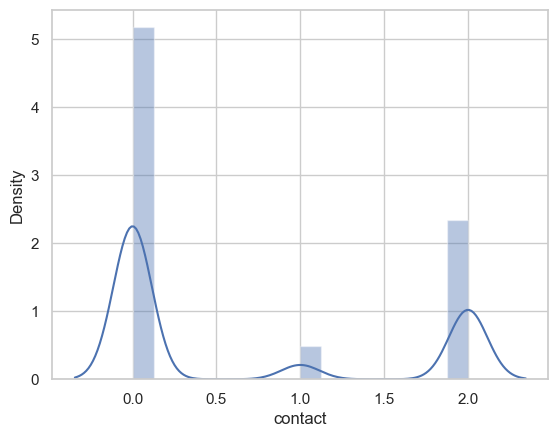

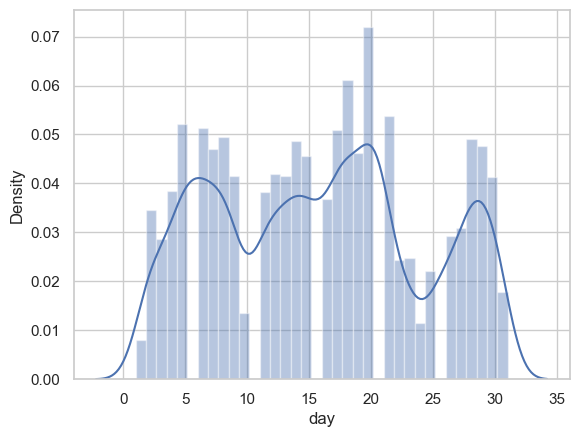

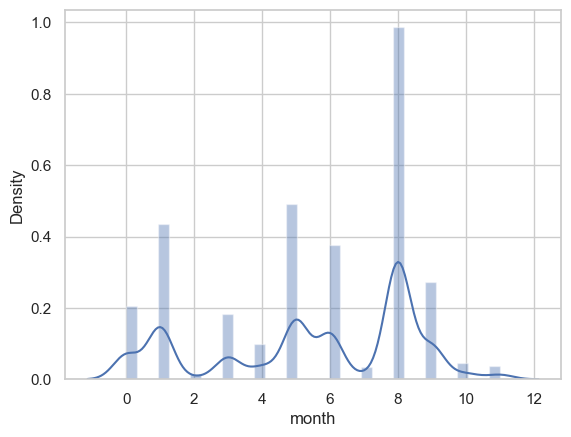

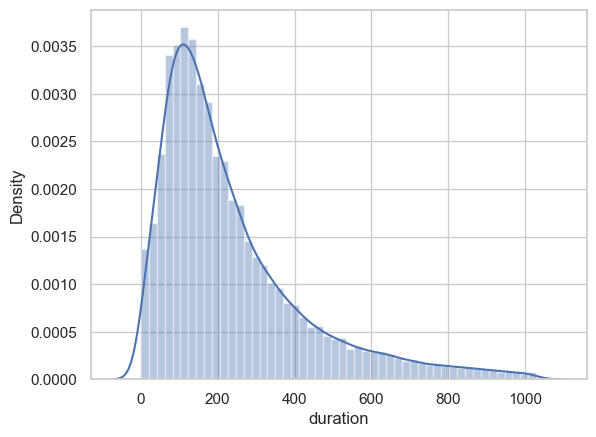

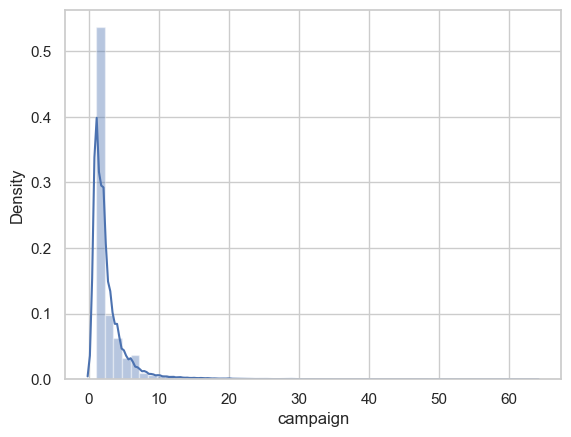

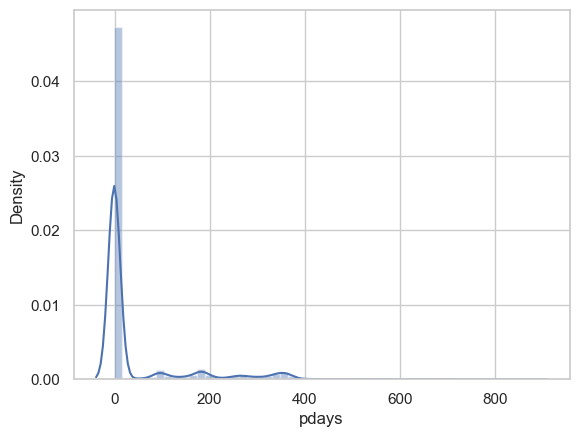

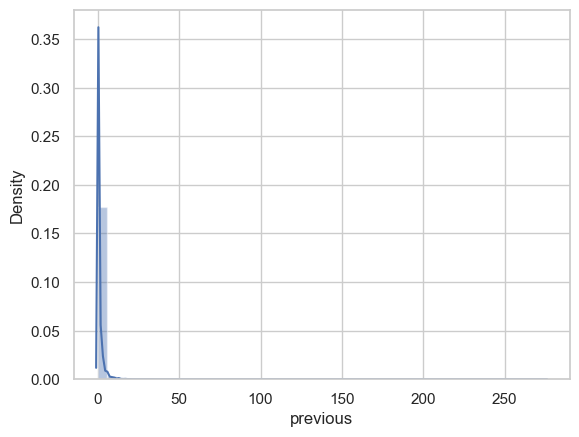

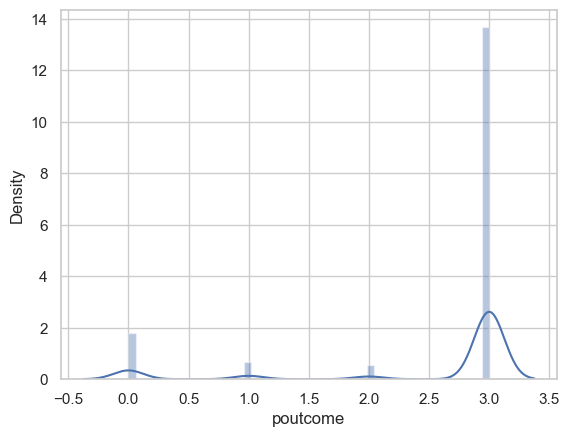

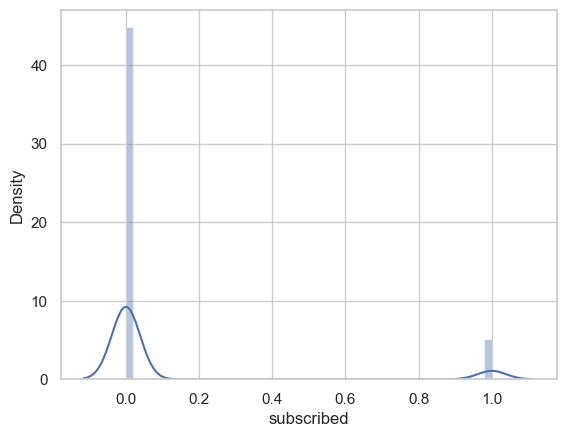

In [36]:
# Checking for the skewness

# Using distplot
columns = df_train1.columns
for i in range(len(columns)):
    sns.distplot(df_train1[columns[i]])
    plt.show()

In [37]:
# Using skew() method

df_train1.skew()

age            0.449710
job            0.268083
marital       -0.102526
education      0.209256
default        7.001011
balance        2.447707
housing       -0.250379
loan           1.799969
contact        0.753685
day            0.087937
month         -0.495467
duration       1.588775
campaign       4.802459
pdays          2.646646
previous      50.665516
poutcome      -1.998311
subscribed     2.598961
dtype: float64

No such skewness is present in the dataset.

In [38]:
# Checking the correalation coefficient matrix
correlation_coefficient = df_train1.corr()
correlation_coefficient

age       job   marital  education   default   balance  \
age         1.000000 -0.029375 -0.411022  -0.096149 -0.011698  0.093125   
job        -0.029375  1.000000  0.066853   0.172548 -0.005100  0.025178   
marital    -0.411022  0.066853  1.000000   0.106822 -0.011157  0.010395   
education  -0.096149  0.172548  0.106822   1.000000 -0.005941  0.055531   
default    -0.011698 -0.005100 -0.011157  -0.005941  1.000000 -0.100620   
balance     0.093125  0.025178  0.010395   0.055531 -0.100620  1.000000   
housing    -0.156349 -0.125056 -0.025062  -0.101501 -0.013887 -0.061827   
loan        0.005101 -0.036618 -0.043410  -0.046532  0.081604 -0.098802   
contact     0.034136 -0.078296 -0.042301  -0.115245  0.014214 -0.034506   
day        -0.008195  0.022795 -0.009143   0.019536  0.010136  0.007361   
month      -0.043006 -0.092465 -0.003194  -0.059295  0.005745  0.024186   
duration   -0.023754 -0.000573  0.016258   0.001383 -0.000723  0.032513   
campaign    0.014991  0.004095 -0.012092   0.007522  0.019147 -0.020180   
pdays      -0.029805 -0.023612  0.020305  -0.000131 -0.030589  0.011667   
previous   -0.001696 -0.004424  0.013409   0.015950 -0.015787  0.023275   
poutcome    0.015538  0.008556 -0.020351  -0.020371  0.035972 -0.039016   
subscribed -0.002394  0.038206  0.054812   0.074308 -0.016821  0.071369   

             housing      loan   contact       day     month  duration  \
age        -0.156349  0.005101  0.034136 -0.008195 -0.043006 -0.023754   
job        -0.125056 -0.036618 -0.078296  0.022795 -0.092465 -0.000573   
marital    -0.025062 -0.043410 -0.042301 -0.009143 -0.003194  0.016258   
education  -0.101501 -0.046532 -0.115245  0.019536 -0.059295  0.001383   
default    -0.013887  0.081604  0.014214  0.010136  0.005745 -0.000723   
balance    -0.061827 -0.098802 -0.034506  0.007361  0.024186  0.032513   
housing     1.000000  0.029888  0.197720 -0.027382  0.278536  0.006338   
loan        0.029888  1.000000 -0.010144  0.015314  0.024844 -0.013595   
contact     0.197720 -0.010144  1.000000 -0.027009  0.369140 -0.025485   
day        -0.027382  0.015314 -0.027009  1.000000 -0.006500 -0.036740   
month       0.278536  0.024844  0.369140 -0.006500  1.000000  0.008848   
duration    0.006338 -0.013595 -0.025485 -0.036740  0.008848  1.000000   
campaign   -0.024041  0.008457  0.021449  0.160892 -0.106018 -0.112513   
pdays       0.122730 -0.020272 -0.246712 -0.089133  0.028288  0.007285   
previous    0.038190 -0.008889 -0.141021 -0.048539  0.019160  0.003379   
poutcome   -0.096698  0.009993  0.274522  0.078526 -0.029106  0.003796   
subscribed -0.144346 -0.075298 -0.155742 -0.032324 -0.025823  0.360023   

            campaign     pdays  previous  poutcome  subscribed  
age         0.014991 -0.029805 -0.001696  0.015538   -0.002394  
job         0.004095 -0.023612 -0.004424  0.008556    0.038206  
marital    -0.012092  0.020305  0.013409 -0.020351    0.054812  
education   0.007522 -0.000131  0.015950 -0.020371    0.074308  
default     0.019147 -0.030589 -0.015787  0.035972   -0.016821  
balance    -0.020180  0.011667  0.023275 -0.039016    0.071369  
housing    -0.024041  0.122730  0.038190 -0.096698   -0.144346  
loan        0.008457 -0.020272 -0.008889  0.009993   -0.075298  
contact     0.021449 -0.246712 -0.141021  0.274522   -0.155742  
day         0.160892 -0.089133 -0.048539  0.078526   -0.032324  
month      -0.106018  0.028288  0.019160 -0.029106   -0.025823  
duration   -0.112513  0.007285  0.003379  0.003796    0.360023  
campaign    1.000000 -0.088294 -0.031972  0.101610   -0.076142  
pdays      -0.088294  1.000000  0.425828 -0.859409    0.115508  
previous   -0.031972  0.425828  1.000000 -0.458765    0.092586  
poutcome    0.101610 -0.859409 -0.458765  1.000000   -0.089794  
subscribed -0.076142  0.115508  0.092586 -0.089794    1.000000

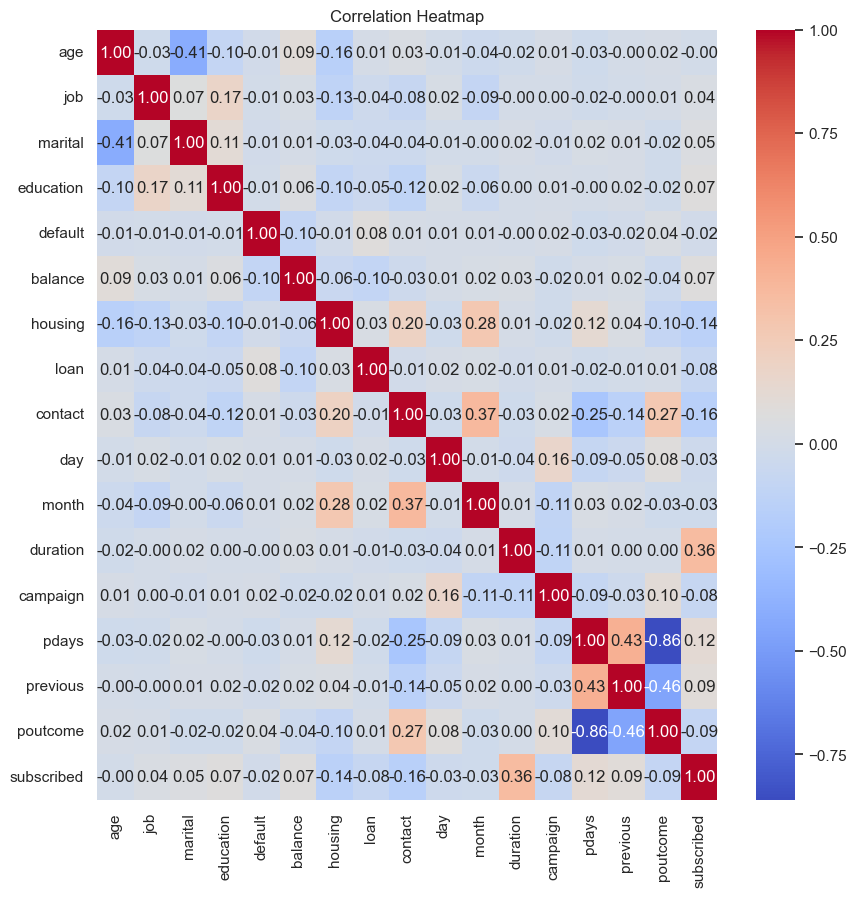

In [39]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

In [40]:
# Extracting features and target from dataset
features = df_train1.drop(columns = ['subscribed'])
target = df_train1['subscribed']

In [41]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df_train1 = scaler.fit_transform(features)

In [42]:
df_train2 = pd.DataFrame(scaled_df_train1, columns = features.columns[:])
df_train2.head()

age       job   marital  education   default   balance   housing  \
0  1.535707 -1.312127 -0.280993   2.384594 -0.140042  0.503752 -1.132988   
1 -0.952074  2.026556 -0.280993  -0.298752 -0.140042 -0.625360 -1.132988   
2 -1.350119  0.812489 -0.280993  -0.298752 -0.140042 -0.105852  0.882622   
3  1.635218 -0.098061 -1.928448   1.042921 -0.140042  1.295886 -1.132988   
4 -0.952074  1.419523 -0.280993  -0.298752 -0.140042 -0.557497  0.882622   

       loan   contact       day     month  duration  campaign     pdays  \
0 -0.445382  0.391324  0.376810  1.161838 -0.995261 -0.247022 -0.407324   
1 -0.445382 -0.716486  0.496482 -0.175999 -0.748275 -0.247022 -0.407324   
2 -0.445382 -0.716486  0.257139 -0.175999  0.034722 -0.567826 -0.407324   
3 -0.445382 -0.716486  0.735824  0.158460  3.329616 -0.567826  0.445390   
4 -0.445382 -0.716486 -1.418258 -0.844918  0.770424 -0.567826 -0.407324   

   previous  poutcome  
0 -0.233614  0.440681  
1 -0.233614  0.440681  
2 -0.233614  0.440681  
3  0.998541 -0.576452  
4 -0.233614  0.440681

#### Checking the Variance Inflation Factor

In [43]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = df_train2.columns
vif_data["VIF"] = [variance_inflation_factor(df_train2.values, i) for i in range(df_train2.shape[1])]

# Print the VIF data
print(vif_data)

     Features       VIF
0         age  1.272149
1         job  1.051282
2     marital  1.227051
3   education  1.065722
4     default  1.017583
5     balance  1.042832
6     housing  1.183710
7        loan  1.022502
8     contact  1.333510
9         day  1.038465
10      month  1.261158
11   duration  1.016617
12   campaign  1.062116
13      pdays  3.897766
14   previous  1.274509
15   poutcome  4.088409


No multicollinearty exist between the features.

In [44]:
# Storing features and target in X and y
X = df_train2
y = target

#### Finding the best random state

In [48]:
# Finding best random state
max_accuracy = 0
max_random_state = 0
for i in range(1, 50):
    rfc = RandomForestClassifier(random_state = i)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_random_state = i 
print("Best Accuracy score is", max_accuracy*100, "at random state", max_random_state)

Best Accuracy score is 91.48090929154712 at random state 8


#### Splitting the dataset into training and testing sets

In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = max_random_state)

#### Different Models for predicting Term Deposit Subscription

In [50]:
# Using different classification models for predicting Term Deposit Subscription

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_lr))
print("Classifiction report:", classification_report(y_test, y_pred_lr))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_lr))

Accuracy score: 0.9015669830059589
Classifiction report:               precision    recall  f1-score   support

           0       0.91      0.98      0.95      8119
           1       0.57      0.21      0.31       943

    accuracy                           0.90      9062
   macro avg       0.74      0.60      0.63      9062
weighted avg       0.88      0.90      0.88      9062

Confusion matrix: [[7970  149]
 [ 743  200]]


In [51]:
# K-Nearest Neighbors
knc_model = KNeighborsClassifier(n_neighbors = 3)
knc_model.fit(X_train, y_train)
y_pred_knc = knc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_knc))
print("Classifiction report:", classification_report(y_test, y_pred_knc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_knc))

Accuracy score: 0.9002427720150077
Classifiction report:               precision    recall  f1-score   support

           0       0.92      0.97      0.95      8119
           1       0.54      0.31      0.40       943

    accuracy                           0.90      9062
   macro avg       0.73      0.64      0.67      9062
weighted avg       0.88      0.90      0.89      9062

Confusion matrix: [[7861  258]
 [ 646  297]]


In [77]:
# Gaussian Naive Bayes
gnb_model = GaussianNB(var_smoothing = 0.2)
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gnb))
print("Classifiction report:", classification_report(y_test, y_pred_gnb))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gnb))

Accuracy score: 0.8506952107702493
Classifiction report:               precision    recall  f1-score   support

           0       0.92      0.91      0.92      8119
           1       0.31      0.36      0.34       943

    accuracy                           0.85      9062
   macro avg       0.62      0.64      0.63      9062
weighted avg       0.86      0.85      0.86      9062

Confusion matrix: [[7365  754]
 [ 599  344]]


In [54]:
# Support Vector Classifier
svc_model = SVC(C = 1.0, kernel = 'rbf', gamma = 'scale')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_svc))
print("Classifiction report:", classification_report(y_test, y_pred_svc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_svc))

Accuracy score: 0.9073052306334143
Classifiction report:               precision    recall  f1-score   support

           0       0.91      0.99      0.95      8119
           1       0.68      0.20      0.31       943

    accuracy                           0.91      9062
   macro avg       0.80      0.60      0.63      9062
weighted avg       0.89      0.91      0.88      9062

Confusion matrix: [[8031   88]
 [ 752  191]]


In [55]:
# Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc_model.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_dtc))
print("Classifiction report:", classification_report(y_test, y_pred_dtc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_dtc))

Accuracy score: 0.8824762745530788
Classifiction report:               precision    recall  f1-score   support

           0       0.94      0.93      0.93      8119
           1       0.44      0.47      0.45       943

    accuracy                           0.88      9062
   macro avg       0.69      0.70      0.69      9062
weighted avg       0.89      0.88      0.88      9062

Confusion matrix: [[7555  564]
 [ 501  442]]


In [56]:
# Random Forest Classifier 
rfc_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, max_depth = 10, random_state = 42)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("Classifiction report:", classification_report(y_test, y_pred_rfc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_rfc))

Accuracy score: 0.9109468108585301
Classifiction report:               precision    recall  f1-score   support

           0       0.92      0.99      0.95      8119
           1       0.72      0.23      0.35       943

    accuracy                           0.91      9062
   macro avg       0.82      0.61      0.65      9062
weighted avg       0.90      0.91      0.89      9062

Confusion matrix: [[8035   84]
 [ 723  220]]


In [57]:
# Extra Trees Classifier
etc_model = ExtraTreesClassifier(criterion = 'entropy', n_estimators = 100, max_depth = 10, random_state = 42)
etc_model.fit(X_train, y_train)
y_pred_etc = etc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_etc))
print("Classifiction report:", classification_report(y_test, y_pred_etc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_etc))

Accuracy score: 0.904877510483337
Classifiction report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      8119
           1       0.75      0.13      0.22       943

    accuracy                           0.90      9062
   macro avg       0.83      0.56      0.58      9062
weighted avg       0.89      0.90      0.87      9062

Confusion matrix: [[8080   39]
 [ 823  120]]


In [58]:
# AdaBoost Classifier
abc_model = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
abc_model.fit(X_train, y_train)
y_pred_abc = abc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_abc))
print("Classifiction report:", classification_report(y_test, y_pred_abc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_abc))

Accuracy score: 0.9082983888766277
Classifiction report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8119
           1       0.60      0.36      0.45       943

    accuracy                           0.91      9062
   macro avg       0.76      0.67      0.70      9062
weighted avg       0.89      0.91      0.90      9062

Confusion matrix: [[7893  226]
 [ 605  338]]


In [59]:
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gbc))
print("Classifiction report:", classification_report(y_test, y_pred_gbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gbc))

Accuracy score: 0.9117192672699184
Classifiction report:               precision    recall  f1-score   support

           0       0.93      0.98      0.95      8119
           1       0.65      0.33      0.43       943

    accuracy                           0.91      9062
   macro avg       0.79      0.65      0.69      9062
weighted avg       0.90      0.91      0.90      9062

Confusion matrix: [[7955  164]
 [ 636  307]]


In [60]:
# XGBoost Classifier
xgbc_model = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
xgbc_model.fit(X_train, y_train)
y_pred_xgbc = xgbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_xgbc))
print("Classifiction report:", classification_report(y_test, y_pred_xgbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_xgbc))

Accuracy score: 0.9111675126903553
Classifiction report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8119
           1       0.67      0.29      0.40       943

    accuracy                           0.91      9062
   macro avg       0.80      0.64      0.68      9062
weighted avg       0.90      0.91      0.89      9062

Confusion matrix: [[7984  135]
 [ 670  273]]


In [61]:
# Bagging Classifier
bc_model = BaggingClassifier(n_estimators = 100, max_samples = 1.0, max_features = 1.0, random_state = 42)
bc_model.fit(X_train, y_train)
y_pred_bc = bc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_bc))
print("Classifiction report:", classification_report(y_test, y_pred_bc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_bc))

Accuracy score: 0.914588391083646
Classifiction report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8119
           1       0.64      0.41      0.50       943

    accuracy                           0.91      9062
   macro avg       0.79      0.69      0.73      9062
weighted avg       0.90      0.91      0.91      9062

Confusion matrix: [[7905  214]
 [ 560  383]]


#### Cross Validation

In [62]:
# Applying Cross Validation Methods on each model

# For Logistic Regression
cv_score = cross_val_score(lr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_lr) - cv_score.mean())

[0.89970209 0.90465155 0.89902334 0.89753352 0.89951995]
0.9000860883269194
Difference between accuracy score and cross validation score: 0.0014808946790395572


In [64]:
# For K-Nearest Neighbors
cv_score = cross_val_score(knc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_knc) - cv_score.mean())

[0.90102615 0.9006787  0.89240192 0.90018209 0.90200298]
0.8992583669541373
Difference between accuracy score and cross validation score: 0.0009844050608703858


In [65]:
# For Gaussian Naive Bayes
cv_score = cross_val_score(gnb_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gnb) - cv_score.mean())

[0.84011917 0.84125145 0.83959609 0.85317    0.85168019]
0.8451633796005351
Difference between accuracy score and cross validation score: -0.005613611337458524


In [66]:
# For Support Vector Classifier
cv_score = cross_val_score(svc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_svc) - cv_score.mean())

[0.90930156 0.90895547 0.90696904 0.90614137 0.90779672]
0.9078328322610238
Difference between accuracy score and cross validation score: -0.0005276016276095641


In [68]:
# For Decision Tree Classifier
cv_score = cross_val_score(dtc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_dtc) - cv_score.mean())

[0.88877855 0.88147658 0.88462175 0.88693925 0.88048336]
0.8844598980781277
Difference between accuracy score and cross validation score: -0.001983623525048994


In [67]:
# For Random Forest Classifier
cv_score = cross_val_score(rfc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_rfc) - cv_score.mean())

[0.91161867 0.91309386 0.9114385  0.91309386 0.91077636]
0.9120042503337423
Difference between accuracy score and cross validation score: -0.0010574394752121963


In [69]:
# For Extra Trees Classifier
cv_score = cross_val_score(etc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_etc) - cv_score.mean())

[0.9040053  0.90614137 0.90514815 0.9063069  0.90531369]
0.9053830820958033
Difference between accuracy score and cross validation score: -0.0005055716124663379


In [70]:
# For Gradient Boosting Classifier
cv_score = cross_val_score(gbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gbc) - cv_score.mean())

[0.91277723 0.91474921 0.91077636 0.91325939 0.91110743]
0.912533925600858
Difference between accuracy score and cross validation score: -0.0008146583309396327


In [71]:
# For AdaBoost Classifier
cv_score = cross_val_score(abc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_abc) - cv_score.mean())

[0.90781198 0.91441814 0.90564476 0.90978315 0.91061083]
0.9096537721574975
Difference between accuracy score and cross validation score: -0.0013553832808698152


In [72]:
# For XGBoost Classifier
cv_score = cross_val_score(xgbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_xgbc) - cv_score.mean())

[0.90963257 0.91110743 0.9109419  0.9109419  0.91077636]
0.9106800320287369
Difference between accuracy score and cross validation score: 0.0004874806616184113


In [73]:
# For Bagging Classifier
cv_score = cross_val_score(bc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_bc) - cv_score.mean())

[0.91112214 0.91524582 0.91077636 0.91557689 0.91392154]
0.9133285508311542
Difference between accuracy score and cross validation score: 0.0012598402524918173


Gaussian Naive Bayes Classifier has given least difference between accuracy score and cross validation score that is -0.005613611337458524

Gaussian Naive Bayes Boosting Classifier model is the best model

#### Hyper Parameter Tuning

In [74]:
# Hyper parameter tuning

# Define the hyperparameter grid for tuning
param_grid = {
    'var_smoothing' : np.logspace(0, -9, num = 100)
}

In [75]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(GaussianNB(), param_grid = param_grid, cv = 5, verbose = 1, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [78]:
grid_search.best_params_

{'var_smoothing': 1.0}

In [79]:
# Creating final model
final_model = GaussianNB(var_smoothing = 0.15199110829529336)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
accu_score = accuracy_score(y_test, pred_values)
print(accu_score * 100)

84.71639814610461


#### Plotting AUC-ROC Curve

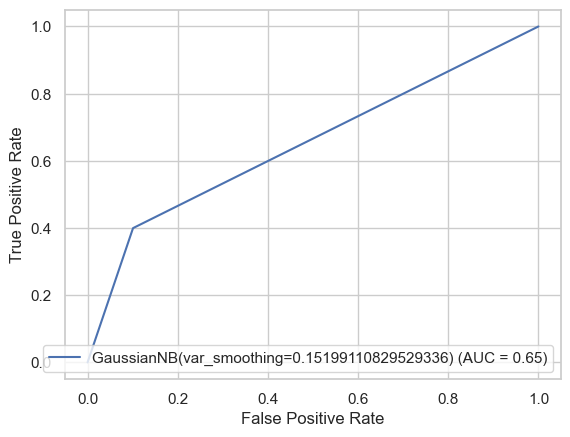

In [80]:
fpr, tpr, thresolds = roc_curve(y_test, pred_values)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()
plt.show()

In [81]:
# Saving the model 
joblib.dump(final_model, "Term_Deposit_Subscription_Prediction_Project.pkl")

['Term_Deposit_Subscription_Prediction_Project.pkl']

In [89]:
# Loading the saved model
model = joblib.load("Term_Deposit_Subscription_Prediction_Project.pkl")

# Predicting values
predicted_values = model.predict(X_test)

# Compairing actual and predicted values
actual_values = np.array(y_test)
df = pd.DataFrame()
df['Actual Values'] = actual_values
df['Predicted Values'] = predicted_values
df

Actual Values  Predicted Values
0                 0                 0
1                 0                 0
2                 0                 0
3                 0                 0
4                 1                 1
...             ...               ...
9057              0                 0
9058              0                 0
9059              0                 0
9060              0                 0
9061              0                 0

[9062 rows x 2 columns]

In [91]:
# Testing the model

# Use the trained model to predict survival
prediction = final_model.predict(df_test)

prediction

array([1, 1, 1, ..., 1, 1, 1])